In [9]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('id_and_type.dat',header=None)

In [11]:
df.head()

,0
0,ITEM: TIMESTEP
1,1000000
2,ITEM: NUMBER OF ATOMS
3,80
4,ITEM: BOX BOUNDS pp pp pp


In [12]:
for id in range(df.size):
    if id % 80 == 0:
        df.drop(range(id, id+9), inplace=True)


KeyboardInterrupt: 

In [ ]:
df = df.reset_index(drop=True)

In [13]:
import pandas as pd

# Initialize an empty list to store data frames
data_frames = []

# Open the file
with open('id_and_type.dat', 'r') as file:
    # Read all lines
    lines = file.readlines()
    
    # Initialize a flag to track whether to skip lines
    skip = False
    
    # Initialize a list to store atom data
    atom_data = []
    
    # Iterate over lines
    for line in lines:
        # If line starts with 'ITEM' and ends with "ITEM: ATOMS id type", set skip flag to True
        if line.startswith('ITEM: TIMESTEP') :
            skip = True
            continue  # Skip to the next iteration
        
        # If line starts with "ITEM: ATOMS id type", reset skip flag and process atom data
        if line.startswith('ITEM: ATOMS id type'):
            skip = False
            # Process atom data
            df = pd.DataFrame(atom_data, columns=['id', 'type'])
            data_frames.append(df)
            atom_data = []  # Reset atom_data list for the next block
            continue  # Skip to the next iteration
        
        # If skip flag is True, continue to the next iteration
        if skip:
            continue
        
        # If line is not skipped, process atom data
        atom_data.append(line.strip().split())

# Concatenate all DataFrames into a single DataFrame
final_data = pd.concat(data_frames, ignore_index=True)

print(final_data)


         id type
0        22    2
1        20    2
2        21    2
3        58    3
4        23    1
...      ..  ...
3383275  26    1
3383276  61    1
3383277  60    1
3383278  80    1
3383279  62    1

[3383280 rows x 2 columns]


In [14]:
data = final_data
# Calculate the block number for each row
data['block'] = (data.index // 80) + 1

# Calculate the row number within each block
data['row_in_block'] = (data.index % 80) + 1

# Function to reorder the rows within each block
def reorder_within_block(group):
    group['id'] = group['id'].astype(int)  # Convert 'id' column to integers
    group = group.sort_values(by='id')  # Sort by 'id' column
    return group

# Apply the function to each block
data = data.groupby('block').apply(reorder_within_block)

# Drop the 'block' and 'row_in_block' columns
data.drop(columns=['block', 'row_in_block'], inplace=True)

# Reset the index
data.reset_index(drop=True, inplace=True)

print(data)

         id type
0         1    3
1         2    3
2         3    3
3         4    2
4         5    1
...      ..  ...
3383275  76    1
3383276  77    1
3383277  78    2
3383278  79    1
3383279  80    1

[3383280 rows x 2 columns]


/tmp/ipykernel_16817/1626994896.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('block').apply(reorder_within_block)


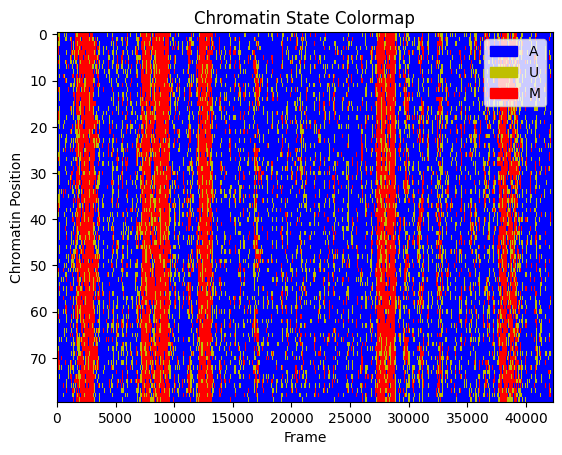

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming 'data' is your DataFrame containing chromatin states
df = data
length_chro = 80
frames_to_show = len(df) // length_chro  # Calculate the number of complete blocks of 80 rows

# Create an array to store each row as a separate column
chromatin_numeric = np.zeros((length_chro, frames_to_show))

# Create a colormap with distinct colors for each state
cmap = ListedColormap(['b', 'y', 'r'])
labels = ['A', 'U', 'M']

# Iterate over each frame to populate chromatin_numeric
for col in range(frames_to_show):
    start_index = col * length_chro
    end_index = (col + 1) * length_chro
    chromatin_state = df.iloc[start_index:end_index]
    chromatin_values = chromatin_state['type'].values.astype(float)
    chromatin_numeric[:, col] = chromatin_values

# Plot the chromatin states using the colormap
plt.imshow(chromatin_numeric, cmap=cmap, aspect='auto', interpolation='none')
plt.title('Chromatin State Colormap')
plt.xlabel('Frame')
plt.ylabel('Chromatin Position')
#plt.yticks([61, 90, 123, 130])  # Adjust y-axis ticks for better visualization
# Add a legend with the corresponding labels
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=cmap(i)) for i in range(len(labels))], labels=labels)



# Display the plot
plt.show()
